In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class Perceptron:
  def __init__(self,qtd_entradas):
    self.w = np.random.uniform(-1, 1,1+qtd_entradas)
    self.iteracoes = 10
    self.learning_rate = 0.01
    self.erros = []
  def fit(self,x,y):
    self.w = np.zeros(1+ x.shape[1])
    for i in range(self.iteracoes):
      erros = 0
      for index_ in range(len(x)):
        k = x[index_].dot(self.w[1:]) + self.w[0]#combinacao
        u = np.where(k>=0,1,-1)#funcao de ativacao
        self.w[1:] =  self.w[1:] + self.learning_rate*(y[index_]-u)*x[index_]#update de pesos
        self.w[0]  += self.learning_rate*(y[index_]-u)#update do bias
        erros += int(y[index_]-u !=0)
      self.erros.append(erros)
      if erros == 0:
        break
  def predict(self,x):
    k = np.array(x).dot(self.w[1:])+self.w[0]#combinacao
    return np.where(k>=0,1,-1)#funcao de ativacao

In [25]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)

In [26]:
data.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [27]:
#data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
y = data.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)
x = data.iloc[0:100,[0,2]].values

In [28]:
clf = Perceptron(2)
clf.fit(x,y)

In [29]:
#clf.w

array([-0.04 , -0.068,  0.182])

In [30]:
y_pred = clf.predict(x)#,y
y_pred

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [31]:
acertos = sum([1 if y[i] == y_pred[i] else 0 for i in range(len(y))])/len(y)
acertos

1.0

In [20]:
clf.erros

[2, 2, 3, 2, 1, 0]

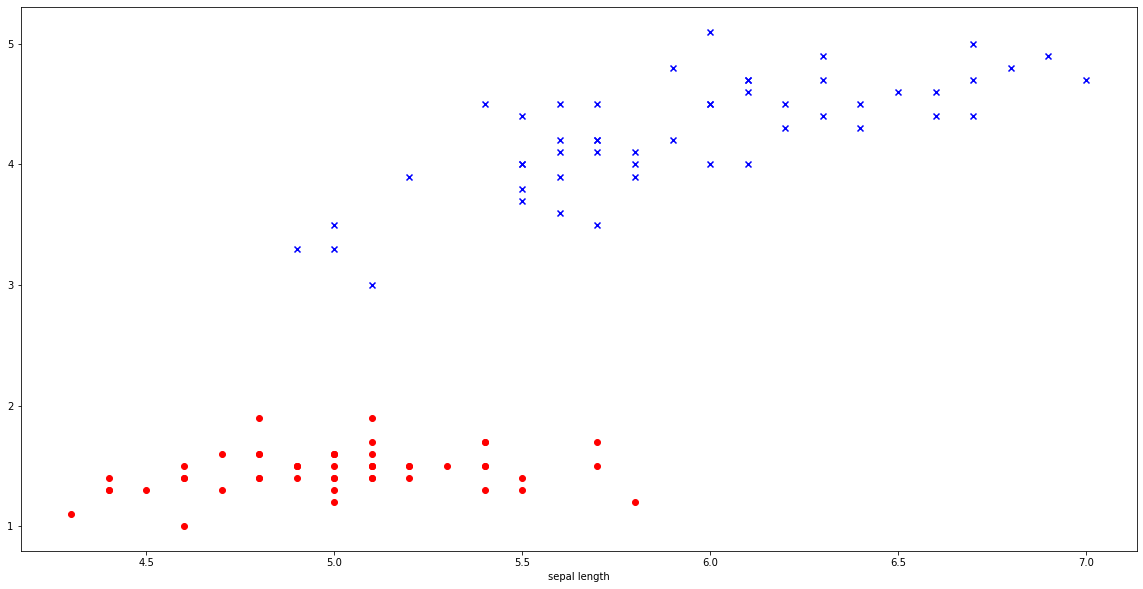

In [135]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.scatter(x[:50,0],x[:50,1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100,0],x[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('Petal length')
plt.xlabel('sepal length')
#plt.figure(figsize=(20,10))
plt.show()

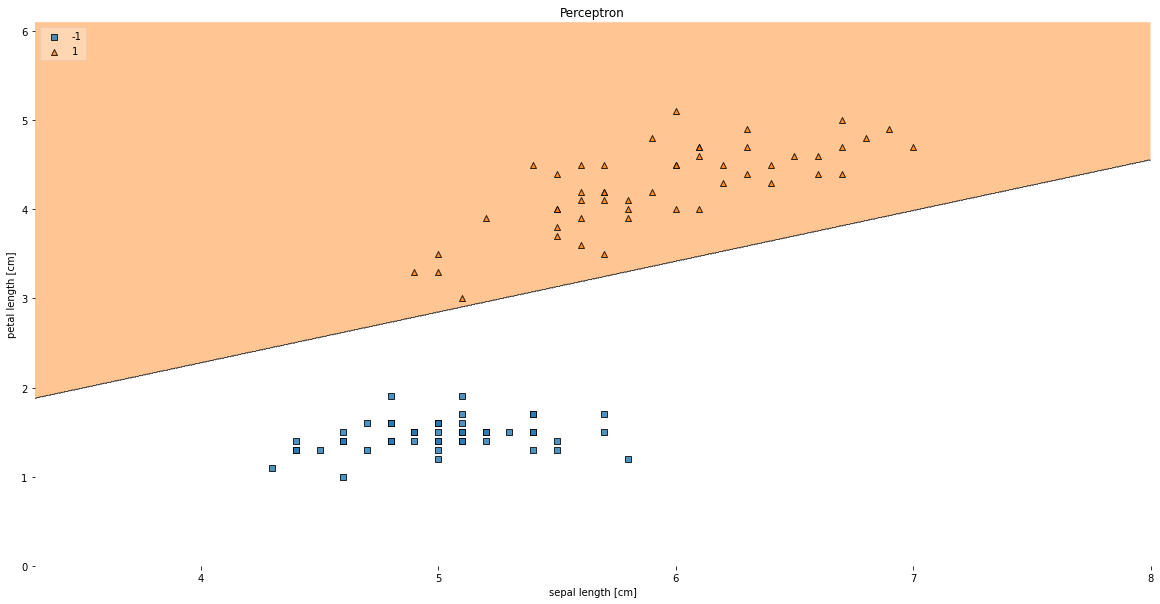

In [137]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting decision regions
plot_decision_regions(x, y, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron')
plt.show()

In [140]:
from sklearn.linear_model import Perceptron
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None)
y = data.iloc[0:100,4].values
y = np.where(y=='Iris-setosa',-1,1)
x = data.iloc[0:100,[0,2]].values
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(x, y)
clf.score(x, y)

1.0

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


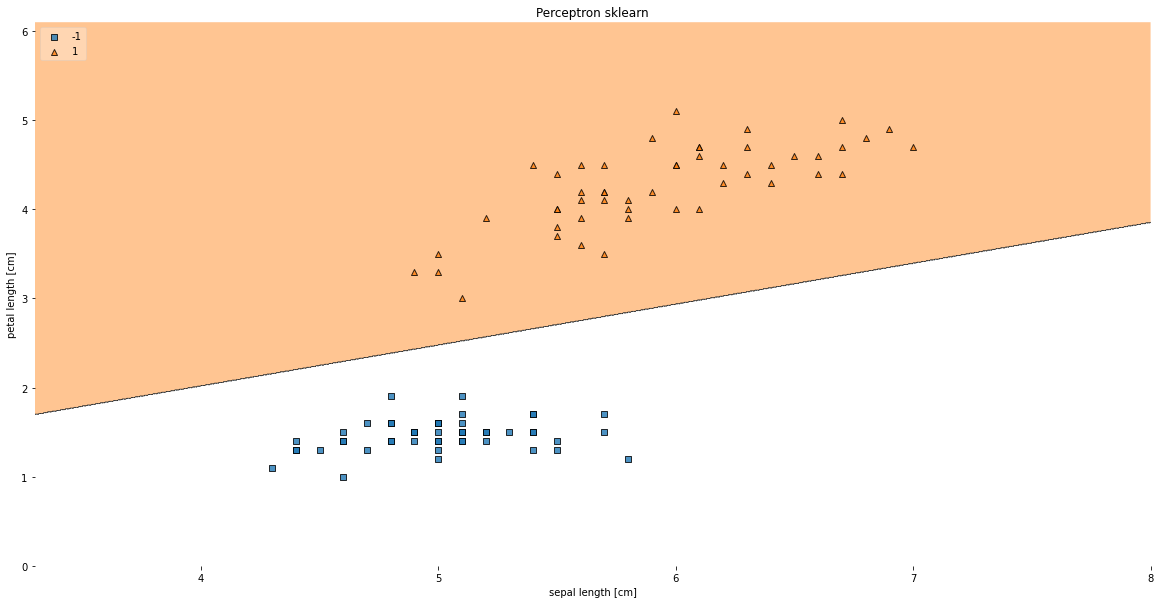

In [141]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
fig, ax = plt.subplots(figsize=(20, 10))

# Plotting decision regions
plot_decision_regions(x, y, clf=clf, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Perceptron sklearn')
plt.show()

# usando as três classes e o SVM

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


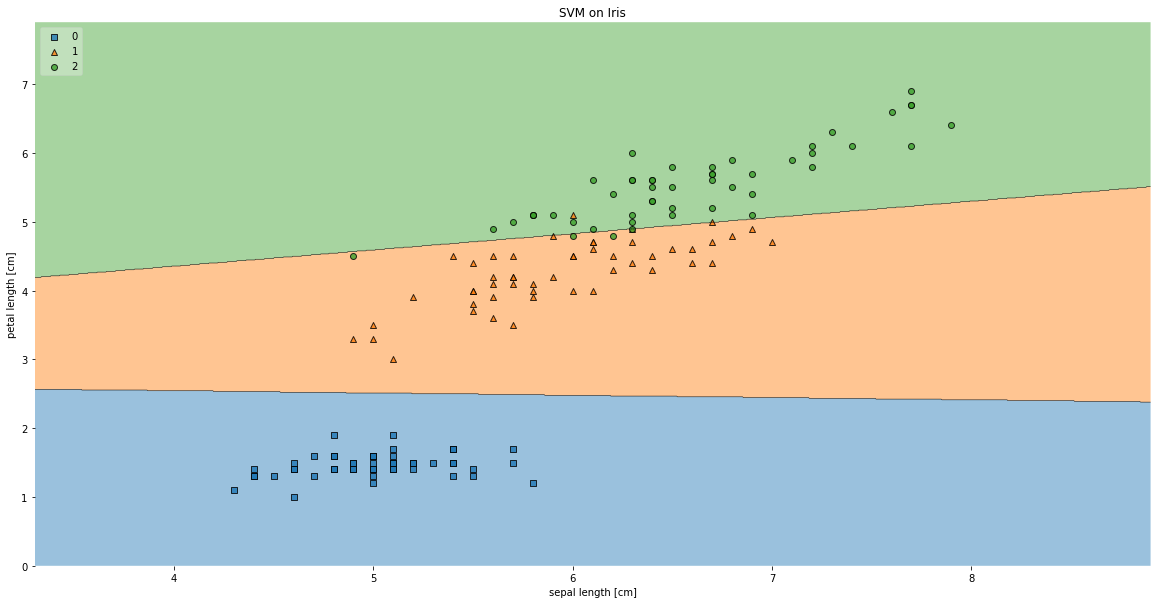

In [143]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
fig, ax = plt.subplots(figsize=(20, 10))
# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Training a classifier
svm = SVC(C=0.5, kernel='linear')
svm.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('SVM on Iris')
plt.show()

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np

# Initializing Classifiers
clf1 = LogisticRegression(random_state=1,
                          solver='newton-cg',
                          multi_class='multinomial')
clf2 = RandomForestClassifier(random_state=1, n_estimators=100)
clf3 = GaussianNB()
clf4 = SVC(gamma='auto')

# Loading some example data
iris = datasets.load_iris()
X = iris.data[:, [0,2]]
y = iris.target

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(),

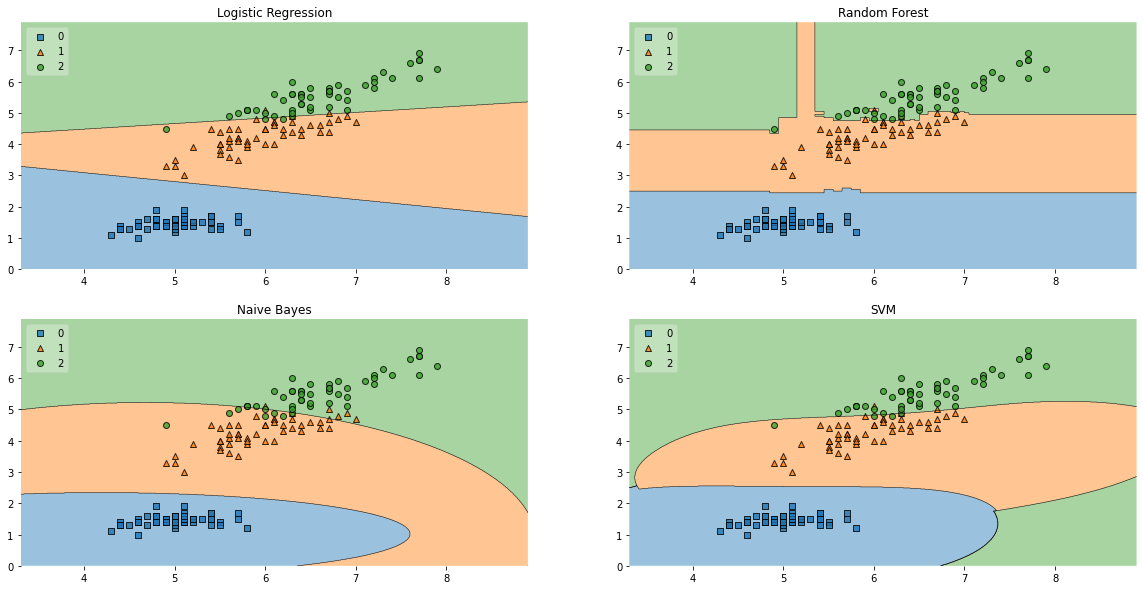

In [147]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(20,10))

labels = ['Logistic Regression', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [154]:
1/(1+np.exp(3))

0.04742587317756678

In [162]:
1+np.exp(3)

21.085536923187668